In [42]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [43]:
#importing the dataset
df=pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [44]:
catcolumns=['sex','smoker','region']
df_dum = pd.get_dummies(df,columns=catcolumns,drop_first=True)
df_dum.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [45]:
x=df_dum[['age','bmi','children','sex_male','smoker_yes','region_northwest','region_southeast','region_southwest']]
y=df_dum['charges']
print(x)


      age     bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.900         0         0           1                 0   
1      18  33.770         1         1           0                 0   
2      28  33.000         3         1           0                 0   
3      33  22.705         0         1           0                 1   
4      32  28.880         0         1           0                 1   
...   ...     ...       ...       ...         ...               ...   
1333   50  30.970         3         1           0                 1   
1334   18  31.920         0         0           0                 0   
1335   18  36.850         0         0           0                 0   
1336   21  25.800         0         0           0                 0   
1337   61  29.070         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                 

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)
print(x)

[0.19216849 0.16586792]
[[-0.55353409  1.55551038]
 [ 1.65540375 -0.52550344]
 [ 1.58189059 -0.43167754]
 ...
 [ 1.74867414 -0.49477467]
 [-1.07090848  1.73671354]
 [-0.95388364 -1.39160958]]


In [48]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=lr.predict(x_te)
r2=r2_score(y_te,y_pred)
mse=mean_squared_error(y_te,y_pred)
print(mse)
print(r2)

148969539.7952743
0.06384983932996646


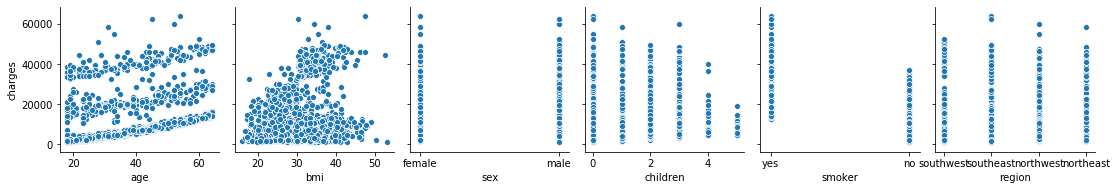

In [51]:
sns.pairplot(df,x_vars=['age','bmi','sex','children','smoker','region'],y_vars=['charges'])
plt.show()